# Genetical Enhancement of fetus vs Pregnancy Diet

## Executive summary

* Respondents are significantly (*p-value 9.4695e-59*, *z-stat -16*) more willing to use GE when it is difficult to obtain (due to pricing) then when it is easily accesible.
* There is significant (*Chi2 p-value* 0.002, *Fisher p-value* 0.001) difference between men and women regarding willigness to use GE when it is easily accesible, men are more willing to use it.
* There is no significant difference between men and women regarding willigness to use GE when it is not easily accesible.
* There is significant (*Chi2 p-value 0.00014*, *Fisher p-value 8.13314e-5*) difference between men a women regarding acceptance of GE.
***
* There is suggestive (*p-value 0.00478*, *z-stat -2.7784*) difference between willingness to use PD when it is cheap and when it is not, respondents seem less willing to use expensive PD
***
* There seems to be difference bewtween in acceptance of GE and PD **TODO** test
* There seems to be difference between interest in use of PD and GE when they are easily accessible. **TODO** - test
* There seems to be difference between interest in use of PD and GE when they are expensive. **TODO** - test

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
from FisherExact import fisher_exact # individual modele by private prson - TODO check

# Import visualization tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# for local imports
import sys
sys.path.append('..')

# local imports
from plot_utils import *
from stat_utils import *


%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!
plt.style.use('ggplot')

# Short analysis of GE (genetical enhancement of fetus) by gender

In [ ]:
df = pd.read_csv('../data/responses_complete_subheader.csv', 
                 encoding='utf-8-sig', header=[0,1], skipinitialspace=True)
df.dropna(how='all', inplace=True)
# select only rows for which we have data on GE
df = df[~pd.isnull(df.xs("GE", axis=1, level=1)).max(axis=1)]
# extract only GE data
# data_GE = df.xs('GE', axis=1, level=1)
df

## Acceptance of GE by gender

### Gender distribution

In [3]:
df["GP"]["Gender"].value_counts()

M    266
F    185
Name: Gender, dtype: int64

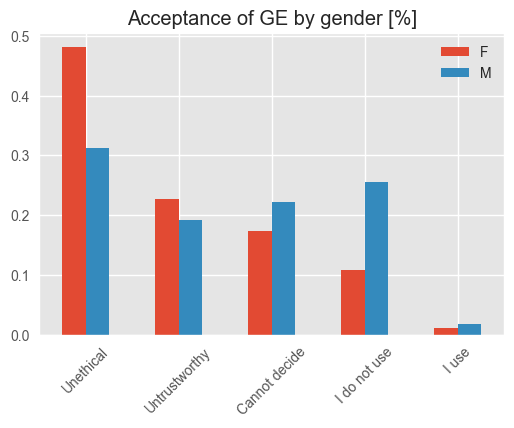

In [4]:
acpt_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["Acpt", "GE"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["Acpt", "GE"].value_counts()),
                           axis=1).reindex(scale_acpt)
acpt_mf_counts.columns = acpt_mf_counts.columns.droplevel()
acpt_mf_counts.columns = ["F", "M"]

(acpt_mf_counts / acpt_mf_counts.sum()).plot(kind='bar', rot=45, title="Acceptance of GE by gender [%]")

### Interest in use of GE by gender

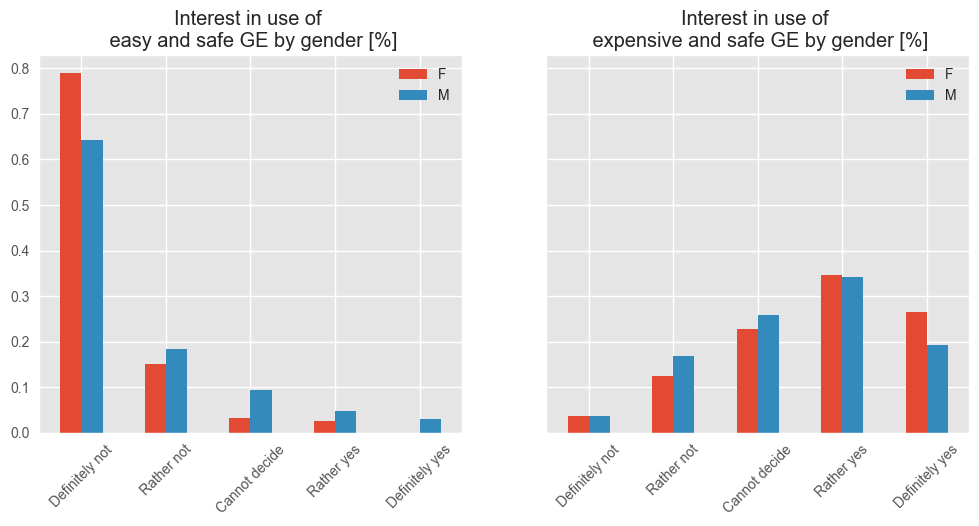

In [5]:
iues_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["IUes", "GE"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["IUes", "GE"].value_counts()),
                           axis=1).reindex(scale_other).fillna(0)
iues_mf_counts.columns = iues_mf_counts.columns.droplevel()
iues_mf_counts.columns = ["F", "M"]



iuds_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["IUds", "GE"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["IUds", "GE"].value_counts()),
                           axis=1).reindex(scale_other)
iuds_mf_counts.columns = iuds_mf_counts.columns.droplevel()
iuds_mf_counts.columns = ["F", "M"]


fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 5))
(iues_mf_counts / iues_mf_counts.sum()).plot(kind="bar", rot=45, ax=ax1,
                                             title="Interest in use of \n easy and safe GE by gender [%]")


(iuds_mf_counts / iuds_mf_counts.sum()).plot(kind="bar", rot=45, ax=ax2,
                                             title="Interest in use of \n expensive and safe GE by gender [%]")

### Interest in use of expensive vs cheap GE

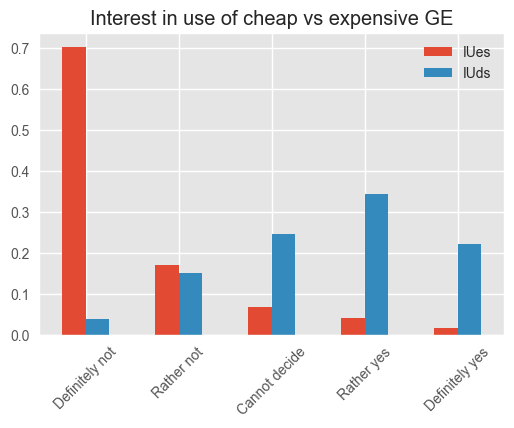

In [6]:
ge_cnts = pd.concat((df['IUes', 'GE'].value_counts(), 
                     df['IUds', 'GE'].value_counts()), 
                     axis=1).reindex(scale_other)
ge_cnts.columns = ge_cnts.columns.droplevel(1)

(ge_cnts / ge_cnts.sum()).plot(kind="bar", rot=45, title="Interest in use of cheap vs expensive GE")

## Sankey's diagram of shift between cheap and expensive GE

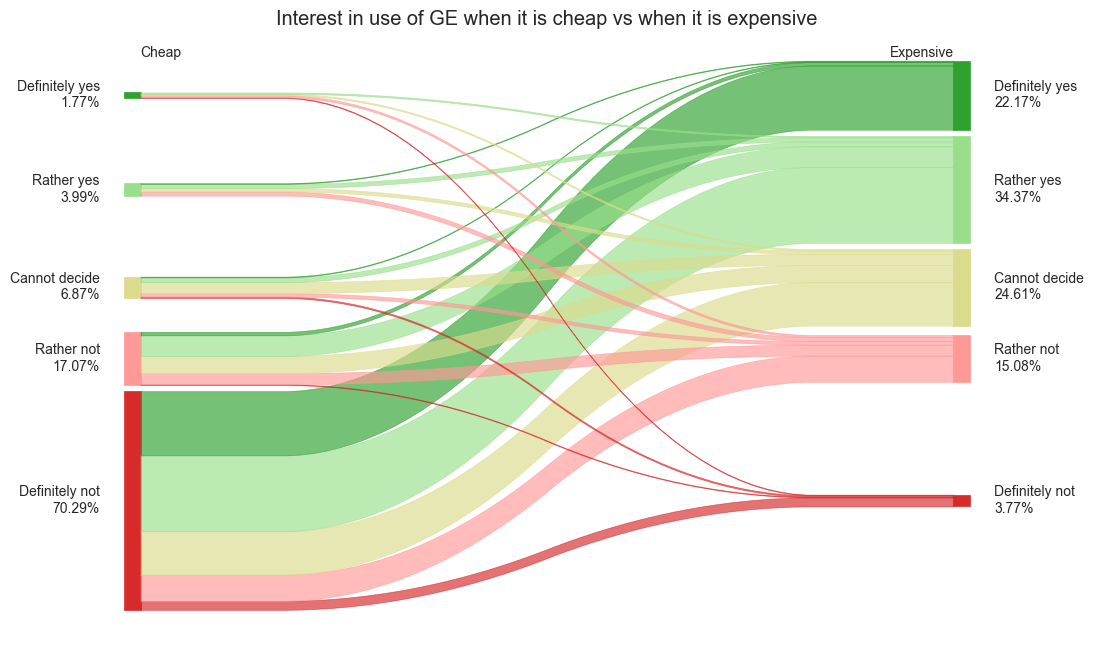

In [7]:
import sankey as sk

fig, ax = plt.subplots()
GE_cheap = df['IUes']['GE'].values
GE_exp = df['IUds']['GE'].values
fig.set_size_inches((12,8))
ax.set_title("Interest in use of GE when it is cheap vs when it is expensive")
sk.sankey(GE_cheap, GE_exp, colorDict=colors, rightColor=True, orderedlabs=scale_other, 
          sideLabs=("Cheap", "Expensive"), yshift=11, ax=ax)

First plot suggests that women regard GE as unethical more often than men.

From the last two plots it is clear, that people tend to accept the genetical enhancemet when it is more difficult or expensive to obtain. From Sankey's diagram it can be seen that most of the respondents changed their opinion on GE use from "Definitely no" to "Definetly yes" or "Rather yes". This might be explained by:
* general notion that more expensive products are reagarded as better in terms of quality,
* (more expensive GE may seem safer, even though the questions states it is the same),
* prestige (Veblen effect https://en.wikipedia.org/wiki/Veblen_good),
* advantage over others,
* the fact that when it is easily accesible the GE might be regarded as forced - coercion.

### Based on this we propose following hypotheses

**H1**: People are more willing to use GE when it is difficult to obtain (due to pricing) then when it is easily accesible.

**H2**: There is no significant difference between men and women regarding willigness to use GE when it is easily accesible.

**H3**: There is no significant difference between men and women regarding willigness to use GE when it is not easily accesible.

**H4**: There is significant difference between men a women regarding acceptance of GE.

## To test hypothesis *H1* we use Wilcoxon signed-rank test

First we assign numeric ranking to different answers.

In [8]:
rank_other = {scl : rnk for scl, rnk in zip(scale_other, range(0,5))}
df_ranked = df[['IUes','IUds','IU_r','IUmd','Dngr']].applymap(rank_other.get)
rank_other

{'Cannot decide': 2,
 'Definitely not': 0,
 'Definitely yes': 4,
 'Rather not': 1,
 'Rather yes': 3}

Summary of ranked dataframe for cheap and expensive GE

In [9]:
df_ranked[["IUes", "IUds"]].xs('GE', axis=1, level=1).describe()

,IUes,IUds
count,451.000000,451.000000
mean,0.498891,2.560976
std,0.917423,1.104610
min,0.000000,0.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,4.000000,4.000000


For wilcoxon signed-rank test null hypothesis *H0* is that the mean values of two samples do *not* differ significantly. Due to large sample size (*n=451*) we use standard score approximation:

In [10]:
large_wilcoxon(df_ranked["IUes"]["GE"], 
               df_ranked["IUds"]["GE"])

{'Wilcoxon_res': WilcoxonResult(statistic=3013.5, pvalue=9.469527549841792e-59),
 'stat_dev': 2313.7307535666291,
 'stat_mean': 40100,
 'z_stat': -16.02887455371847}

The *z-value* -16.029 exceedes even 0.1% percentile, we can reject *H0* with significance *alpha* = 0.005, same holds for *p-value*, the test result is significant.

Based on the results of Wilcoxon test we do not reject hypothesis **H1** and we can conclude that interest in use of genetic enhancement of human fetus is more desired at higher price.

## To test hypothesis *H2*, *H3* and *H4* we use Chisquare test and Fisher test

### *H2*

In [11]:
iues_mf_count_sums = pd.concat((iues_mf_counts, iues_mf_counts.sum(axis=1)), axis=1)
iues_mf_count_sums = iues_mf_count_sums.append(pd.Series(iues_mf_count_sums.sum(axis=0), name="sum"))
iues_mf_count_sums

,F,M,0
Definitely not,146.0,171.0,317.0
Rather not,28.0,49.0,77.0
Cannot decide,6.0,25.0,31.0
Rather yes,5.0,13.0,18.0
Definitely yes,0.0,8.0,8.0
sum,185.0,266.0,451.0


In [12]:
st.chi2_contingency(iues_mf_counts)

(16.896963093732733,
 0.0020241053042012991,
 4L,
 array([[ 130.03325942,  186.96674058],
        [  31.58536585,   45.41463415],
        [  12.71618625,   18.28381375],
        [   7.38359202,   10.61640798],
        [   3.28159645,    4.71840355]]))

Chi square test is not reliable due to zero cell value and expected frequencies lower than 5, we try using Fisher test but is it valid when the row sums are not bounded?

In [13]:
fisher_exact(iues_mf_counts)

0.0012565721004187866

The difference is significant - based on the plots above we can conclude that males are more willing to use GE when it is cheap, although the significance of this result is (imo) somewhat diminished by largely disproportional distribution of responses overall.

### *H3*

In [14]:
iuds_mf_count_sums = pd.concat((iuds_mf_counts, iuds_mf_counts.sum(axis=1)), axis=1)
iuds_mf_count_sums = iuds_mf_count_sums.append(pd.Series(iuds_mf_count_sums.sum(axis=0), name="sum"))
iuds_mf_count_sums

,F,M,0
Definitely not,7,10,17
Rather not,23,45,68
Cannot decide,42,69,111
Rather yes,64,91,155
Definitely yes,49,51,100
sum,185,266,451


In [15]:
st.chi2_contingency(iuds_mf_counts)

(4.5571789008005528,
 0.33582127972540876,
 4L,
 array([[  6.97339246,  10.02660754],
        [ 27.89356984,  40.10643016],
        [ 45.53215078,  65.46784922],
        [ 63.58093126,  91.41906874],
        [ 41.01995565,  58.98004435]]))

In [16]:
fisher_exact(iuds_mf_counts)

0.3393723887001541

### *H4* - acceptance of GE in Males vs Females

In [17]:
acpt_mf_count_sums = pd.concat((acpt_mf_counts, acpt_mf_counts.sum(axis=1)), axis=1)
acpt_mf_count_sums = acpt_mf_count_sums.append(pd.Series(acpt_mf_count_sums.sum(axis=0), name="sum"))
acpt_mf_count_sums

,F,M,0
Unethical,89,83,172
Untrustworthy,42,51,93
Cannot decide,32,59,91
I do not use,20,68,88
I use,2,5,7
sum,185,266,451


In [18]:
st.chi2_contingency(acpt_mf_counts)

(22.744786421742273,
 0.00014239216604442138,
 4L,
 array([[  70.55432373,  101.44567627],
        [  38.14855876,   54.85144124],
        [  37.32815965,   53.67184035],
        [  36.09756098,   51.90243902],
        [   2.8713969 ,    4.1286031 ]]))

In [19]:
fisher_exact(acpt_mf_counts)

8.133143555911618e-05

# Short analysis of PD (pregnancy diet)

In [20]:
#drop rows for which we don't have data on GE and PD
df_PD = df[~pd.isnull(df.xs("PD", axis=1, level=1)).max(axis=1)]
data_PD = df.xs('PD', axis=1, level=1)

### Acceptance of PD by gender

,F,M
Unethical,1,8
Untrustworthy,13,11
Cannot decide,15,23
I do not use,125,195
I use,31,29


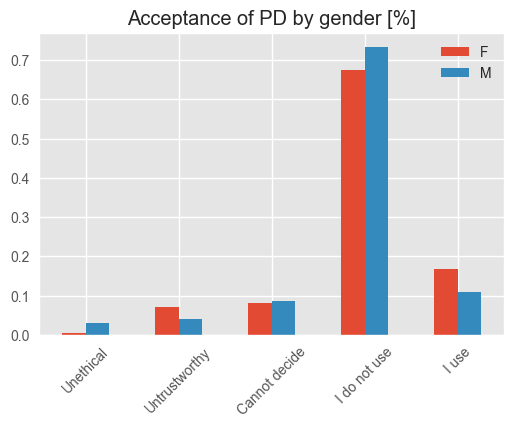

In [21]:
acpt_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["Acpt", "PD"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["Acpt", "PD"].value_counts()),
                           axis=1).reindex(scale_acpt)
acpt_mf_counts.columns = acpt_mf_counts.columns.droplevel()
acpt_mf_counts.columns = ["F", "M"]


(acpt_mf_counts / acpt_mf_counts.sum()).plot(kind="bar", rot=45, title="Acceptance of PD by gender [%]")
acpt_mf_counts

PD is regarded as acceptable regardles of gender.

### Interest in use of easily accesible and safe PD by gender

,F,M
Definitely not,74,100
Rather not,42,61
Cannot decide,26,45
Rather yes,31,47
Definitely yes,12,13


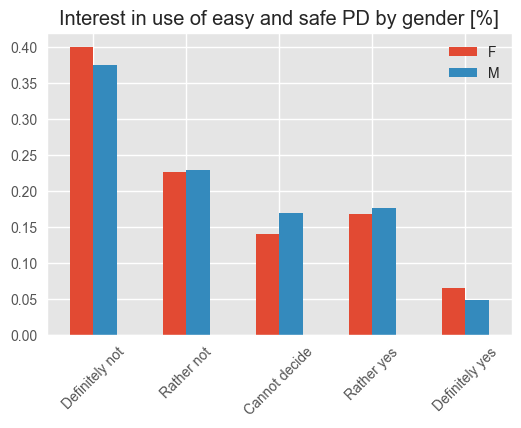

In [22]:
iues_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["IUes", "PD"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["IUes", "PD"].value_counts()),
                           axis=1).reindex(scale_other)
iues_mf_counts.columns = iues_mf_counts.columns.droplevel()
iues_mf_counts.columns = ["F", "M"]

(iues_mf_counts / iues_mf_counts.sum()).plot(kind="bar", rot=45, title="Interest in use of easy and safe PD by gender [%]")
iues_mf_counts

### Interest in use of expensive and safe PD by gender

,F,M
Definitely not,74,100
Rather not,42,61
Cannot decide,26,45
Rather yes,31,47
Definitely yes,12,13


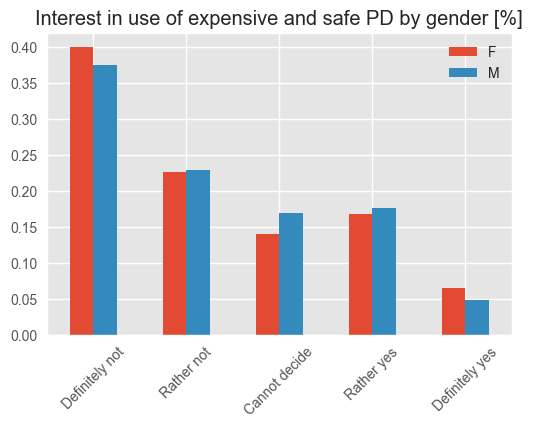

In [23]:
iuds_mf_counts = pd.concat((df[df["GP", "Gender"]=="F"]["IUds", "PD"].value_counts(),
                            df[df["GP", "Gender"]=="M"]["IUds", "PD"].value_counts()),
                           axis=1).reindex(scale_other)
iuds_mf_counts.columns = iuds_mf_counts.columns.droplevel()
iuds_mf_counts.columns = ["F", "M"]

(iues_mf_counts / iues_mf_counts.sum()).plot(kind="bar", rot=45, 
                                             title="Interest in use of expensive and safe PD by gender [%]")
iues_mf_counts

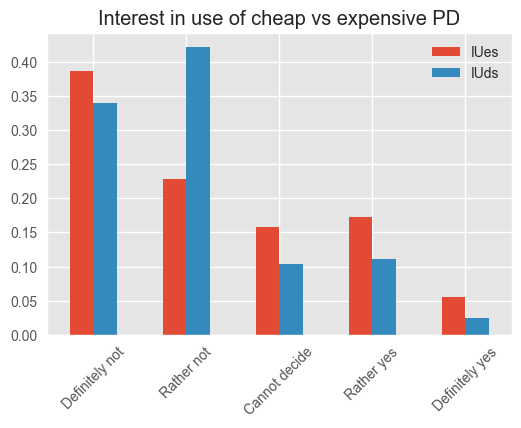

In [24]:
PD_cnts = pd.concat((df['IUes', 'PD'].value_counts(), 
                       df['IUds', 'PD'].value_counts()), 
                      axis=1).reindex(scale_other)
PD_cnts.columns = PD_cnts.columns.droplevel(1)

(PD_cnts / PD_cnts.sum()).plot(kind="bar", rot=45, title="Interest in use of cheap vs expensive PD")

## Sankey's diagram of shift between cheap and expensive PD

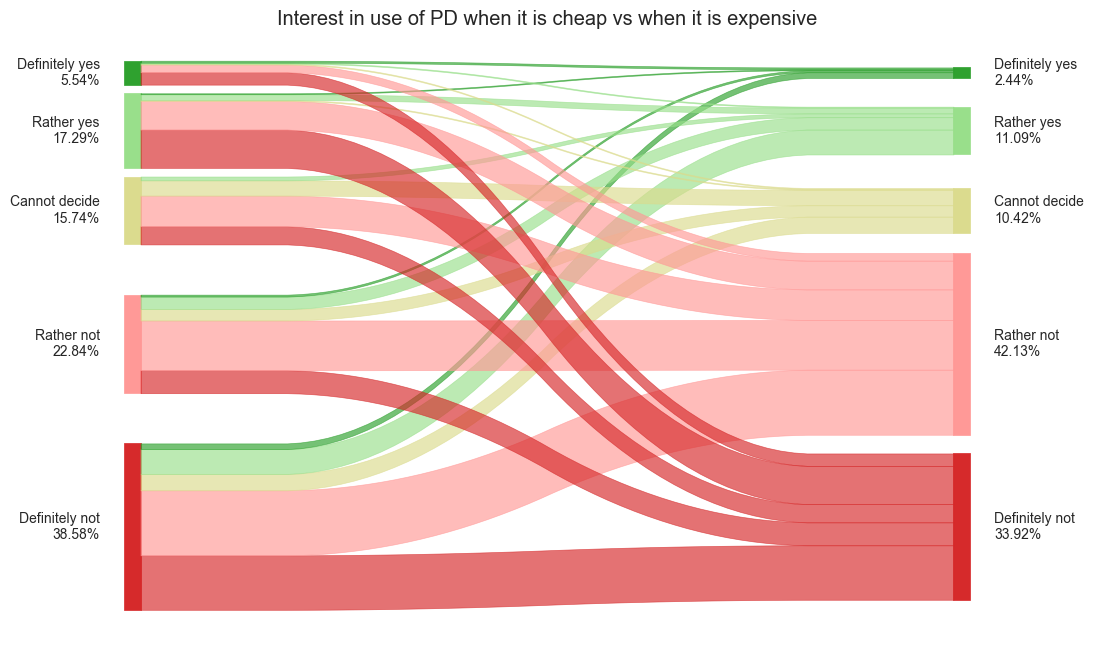

In [25]:

PD_cheap = df['IUes']['PD'].values
PD_exp = df['IUds']['PD'].values
fig, ax = plt.subplots()
ax.set_title("Interest in use of PD when it is cheap vs when it is expensive")
fig.set_size_inches((12,8))
sk.sankey(PD_cheap, PD_exp, colorDict=colors, rightColor=True, orderedlabs=scale_other, ax=ax)

In [26]:
df_ranked["IUes"]["PD"].describe()

count    451.000000
mean       1.283814
std        1.287264
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: PD, dtype: float64

In [27]:
df_ranked["IUds"]["PD"].describe()

count    451.000000
mean       1.059867
std        1.051331
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: PD, dtype: float64

For wilcoxon signed-rank test null hypothesis *H0* is that the mean values of two samples do *not* differ significantly. Due to large sample size (*n=451*) we use standard score approximation:

In [28]:
large_wilcoxon(df_ranked["IUes"]["PD"], 
               df_ranked["IUds"]["PD"])

{'Wilcoxon_res': WilcoxonResult(statistic=20801.0, pvalue=0.0047812914349230204),
 'stat_dev': 1640.8655490319734,
 'stat_mean': 25360,
 'z_stat': -2.7784116758923827}

# Comparison of GE and PD

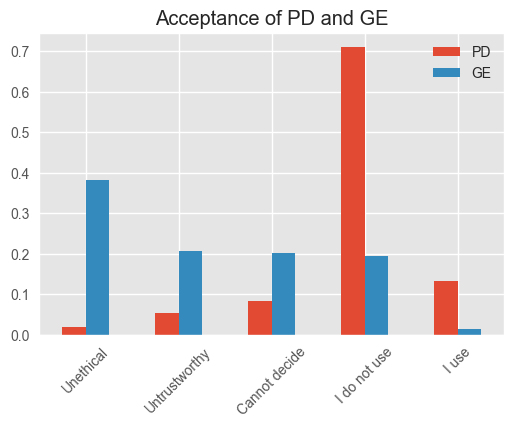

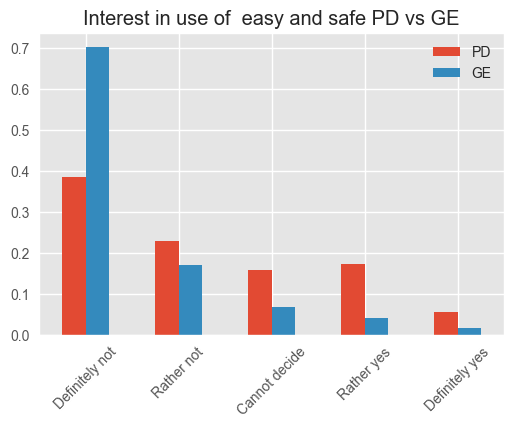

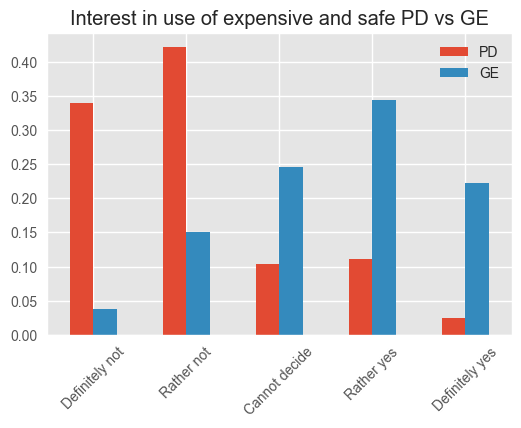

In [29]:
acpt_cnts = pd.concat((df_PD['Acpt', 'PD'].value_counts(), 
                       df_PD['Acpt', 'GE'].value_counts()), 
                      axis=1).reindex(index=scale_acpt)
acpt_cnts.columns = acpt_cnts.columns.droplevel()
(acpt_cnts / acpt_cnts.sum()).plot(kind="bar", rot=45, 
                                             title="Acceptance of PD and GE")

iues_cnts = pd.concat((df_PD['IUes', 'PD'].value_counts(), 
                       df_PD['IUes', 'GE'].value_counts()), 
                      axis=1).reindex(scale_other)
iues_cnts.columns = iues_cnts.columns.droplevel()
(iues_cnts / iues_cnts.sum()).plot(kind="bar", rot=45, 
                                             title="Interest in use of  easy and safe PD vs GE")


iuds_cnts = pd.concat((df_PD['IUds', 'PD'].value_counts(), 
                       df_PD['IUds', 'GE'].value_counts()), 
                      axis=1).reindex(scale_other)
iuds_cnts.columns = iuds_cnts.columns.droplevel()
(iuds_cnts / iuds_cnts.sum()).plot(kind="bar", rot=45, 
                                             title="Interest in use of expensive and safe PD vs GE")

There seems to be significant difference between Interest in use of PD and GE when it is expensive.